Hello, This is my Data mining project 3. Today, we will be doing analysis and creating a regression model using the Ames Housing Dataset, which is a well known dataset for predicting house prices. Housing prices are influenced by numerous factors making it a perfect problem for regression analysis. By building a regression model, we can better understand the relationship between the features and the target variable, providing valuable insights for buyers, sellers, and real estate professionals.

### The aim of this analysis

Today I will assume the role of a data analyst working at a major real estate company, I need to analyze the Ames Housing Dataset and develop a regression model that can accurately predict the sale price of a house based on the available features. Some of the questions we aim to answer include the following:

- Which features are most important in determining the sale price of a house?
- Are there any patterns or trends in the dataset that can help us make better predictions?
- Can we build a predictive model that can accurately predict the sale price of a house based on the data available?

### About the data

The link to the dataset: [Ames Iowa Housing Dataset](https://www.kaggle.com/datasets/marcopale/housing?resource=download&select=train.csv)

The Ames Housing Dataset was found on Kaggle.com. It is a widely used real estate dataset and contains detailed information on multiple aspects of residential properties in Ames, Iowa. Some of the features included in the dataset are:

- Lot Area: The size of the lot in square feet
- Overall Quality: Rating of the overall material and finish quality of the house
- Year Built: The year the house was built
- Total Basement Square Footage: The total square footage of the basement
- Garage Cars: The size of the car in terms of car capacity
- SalePrice: The target variable representing the final sale price of the house

The Dataset contains 2,900 records and 82 features

### What is Regression?

Before we start our analysis, we need to define what regression is!

Regression is statistical and machine learning technique used to model relationships between a dependent variable (target) and one or multiple independent variables (features). The goal of regression is to identify patterns in the data that allow us to make predictions about new and unseen observations. Regression is used to many areas of life, such as real estate pricing where numerical predictions are important. 

So how does it work? Regression works by analyzing already existing observations to find a mathematical function that best describes the relationship between the independent variables and the dependent variable. The function is used to predict new values. We are focusing on Linear Regression in this project!

So Linear Regression? Linear Regression is simple and widely used! It assumes a linear relationship between the input variables (X) and the target variable (Y). The formula for simple linear regression is:

Y = b0 + b1 * X + E

and for multiple linear regression:

 Y = b0 + b1 * X1 + b2 * X2 + ... + bn * Xn + E

 Where:

 - Y is the target variable
 - X is the independent variable
 - b0 is the y-intercept 
 - b1, b2,..., bn are the coefficients for each independent variable
 - E is the error term

 The aim of Linear regression is to find the best fit line that minimizes the difference between the actual and predicted values. This is done by using the Ordinary Least Squares algorithm, which minimizes the sum of squared errors. 




### Understanding the data

Before building any regression model, we have to explore and understand the dataset! This helps us identify important patterns, relationships between features, and potential issues like missing values or outliers.

In [99]:
# Importing necessary libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures 



In [100]:
# Creating a dataframe
df = pd.read_csv("/Users/ahmadjebril/Downloads/archive (5)/AmesHousing.csv")
df.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [101]:
# we can look at the shape and the index values of the dataset
print("The index is: " + str(df.index))
print("The shape is: " + str(df.shape))

The index is: RangeIndex(start=0, stop=2930, step=1)
The shape is: (2930, 82)


In [102]:
# Basic info about the dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2930 non-null   int64  
 1   PID              2930 non-null   int64  
 2   MS SubClass      2930 non-null   int64  
 3   MS Zoning        2930 non-null   object 
 4   Lot Frontage     2440 non-null   float64
 5   Lot Area         2930 non-null   int64  
 6   Street           2930 non-null   object 
 7   Alley            198 non-null    object 
 8   Lot Shape        2930 non-null   object 
 9   Land Contour     2930 non-null   object 
 10  Utilities        2930 non-null   object 
 11  Lot Config       2930 non-null   object 
 12  Land Slope       2930 non-null   object 
 13  Neighborhood     2930 non-null   object 
 14  Condition 1      2930 non-null   object 
 15  Condition 2      2930 non-null   object 
 16  Bldg Type        2930 non-null   object 
 17  House Style   

In [103]:
# summary statistics
print(df.describe())

            Order           PID  MS SubClass  Lot Frontage       Lot Area  \
count  2930.00000  2.930000e+03  2930.000000   2440.000000    2930.000000   
mean   1465.50000  7.144645e+08    57.387372     69.224590   10147.921843   
std     845.96247  1.887308e+08    42.638025     23.365335    7880.017759   
min       1.00000  5.263011e+08    20.000000     21.000000    1300.000000   
25%     733.25000  5.284770e+08    20.000000     58.000000    7440.250000   
50%    1465.50000  5.354536e+08    50.000000     68.000000    9436.500000   
75%    2197.75000  9.071811e+08    70.000000     80.000000   11555.250000   
max    2930.00000  1.007100e+09   190.000000    313.000000  215245.000000   

       Overall Qual  Overall Cond   Year Built  Year Remod/Add  Mas Vnr Area  \
count   2930.000000   2930.000000  2930.000000     2930.000000   2907.000000   
mean       6.094881      5.563140  1971.356314     1984.266553    101.896801   
std        1.411026      1.111537    30.245361       20.860286    

In [104]:
# checking for missing values
print(df.isnull().sum())

Order               0
PID                 0
MS SubClass         0
MS Zoning           0
Lot Frontage      490
                 ... 
Mo Sold             0
Yr Sold             0
Sale Type           0
Sale Condition      0
SalePrice           0
Length: 82, dtype: int64


Next, we want to check how strong different features are correlated with each other and with SalePrice (target variable). The features that are highly correlated with the target variable are valuable predictors, while features that are highly correlated with each other might cause multicollinearity! Let us create a heatmap:

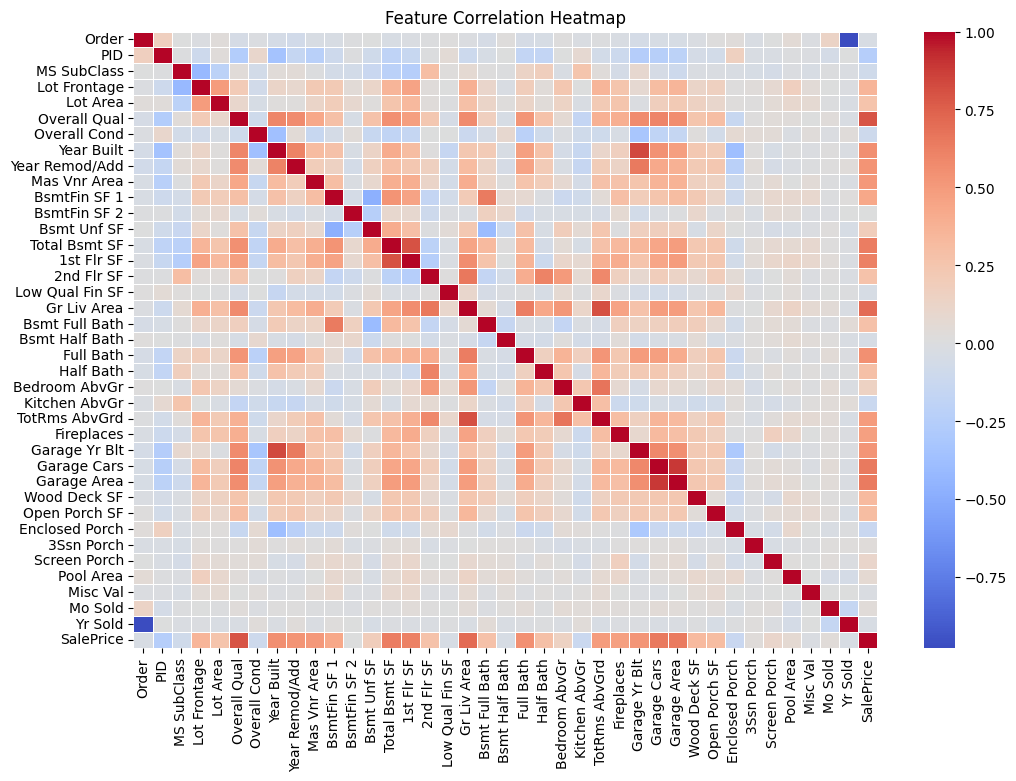

In [105]:
# Selecting only numerical columns
numeric_df = df.select_dtypes(include=['number'])

# Computing correlation matrix
corr_matrix = numeric_df.corr()

# Plotting heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=False, cmap="coolwarm", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

- Features like OverallQual, GrLivArea, and TotalBsmtSF have strong positive correlation with SalePrice
- Features like GarageCars, GarageArea, and YearBuilt have strong positive correlation with each other

We could use scatter plots and box plots to get a better understanding of key relationships!

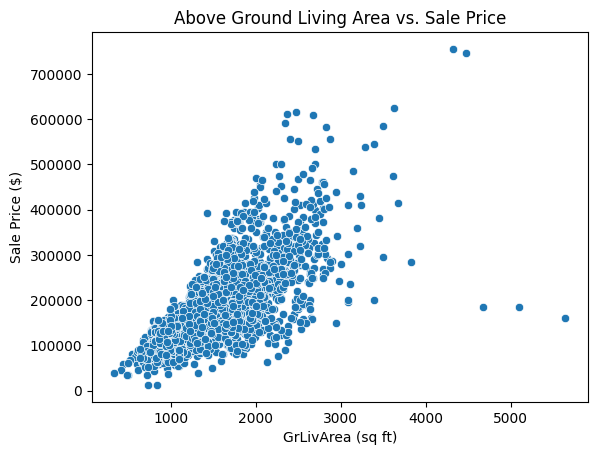

In [106]:
# Scatter plot
sns.scatterplot(x=df['Gr Liv Area'], y=df['SalePrice'])
plt.title("Above Ground Living Area vs. Sale Price")
plt.xlabel("GrLivArea (sq ft)")
plt.ylabel("Sale Price ($)")
plt.show()

- Larger homes have higher prices as expected
- We can see a couple of outliers

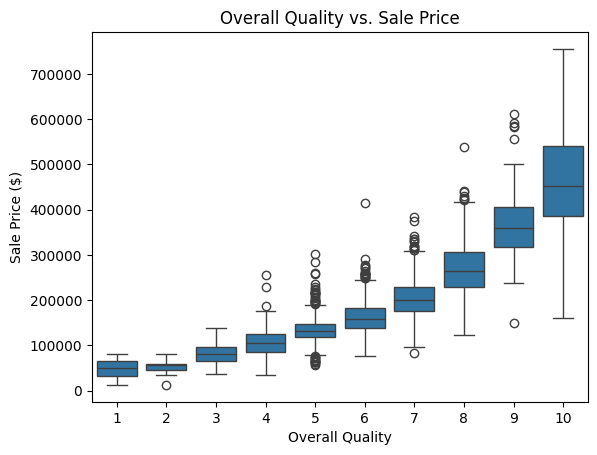

In [107]:
# Box Plot
sns.boxplot(x=df['Overall Qual'], y=df['SalePrice'])
plt.title("Overall Quality vs. Sale Price")
plt.xlabel("Overall Quality")
plt.ylabel("Sale Price ($)")
plt.show()

- Houses with higher quality ratings tend to have higher prices
- This is an important feature for prediction because we can see sharp price increases between quality levels

We should also identify outliers since they distort regression models!

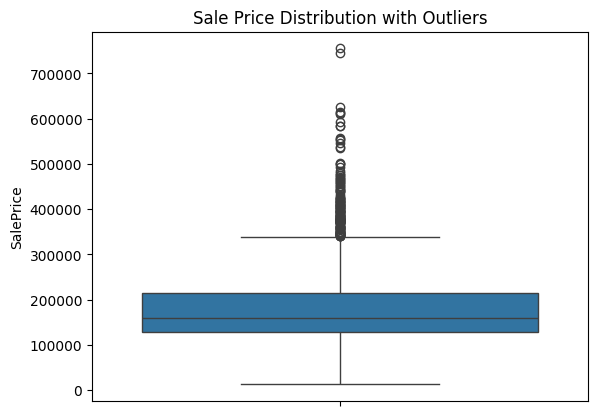

In [108]:
# Using a box plot for outlier detection
sns.boxplot(y=df['SalePrice'])
plt.title("Sale Price Distribution with Outliers")
plt.show()

Some houses have unsual prices which may require removal to prevent skewing the model.

### Pre-processing
Before building any regression model, we need to preprocess the data! In this experiment, we will handle the missing values and select features that logically impact the target variable.

Let's start with handling missing values!

In [109]:
## checking for missing values
## since we have a lot of columns this will have better output
print(df.isnull().sum()[df.isnull().sum() > 0])

Lot Frontage       490
Alley             2732
Mas Vnr Type      1775
Mas Vnr Area        23
Bsmt Qual           80
Bsmt Cond           80
Bsmt Exposure       83
BsmtFin Type 1      80
BsmtFin SF 1         1
BsmtFin Type 2      81
BsmtFin SF 2         1
Bsmt Unf SF          1
Total Bsmt SF        1
Electrical           1
Bsmt Full Bath       2
Bsmt Half Bath       2
Fireplace Qu      1422
Garage Type        157
Garage Yr Blt      159
Garage Finish      159
Garage Cars          1
Garage Area          1
Garage Qual        159
Garage Cond        159
Pool QC           2917
Fence             2358
Misc Feature      2824
dtype: int64


The above features are missing some values! we could easily fix this by grouping by the numerical and categorical features separately, then filling in the missing values accordingly.

In [110]:
# Identifying numerical and categorical columns (in case we change features for experiment 2 and 3)
num_cols = df.select_dtypes(include=['number']).columns
cat_cols = df.select_dtypes(include=['object']).columns

# filling the numerical missing values with the median
df[num_cols] = df[num_cols].apply(lambda x: x.fillna(x.median()))
# filling the categorical missing values with 'Unknown'
df[cat_cols] = df[cat_cols].apply(lambda x: x.fillna(x.mode()[0]))

In [111]:
## checking for missing values again 
print(df.isnull().sum()[df.isnull().sum() > 0])

Series([], dtype: int64)


Nothing prints!! mission successful

We should also check for duplicates and handle them!

In [112]:
# checking for duplicates
print(df.duplicated().sum())  


0


In [113]:
# handling duplicates
df = df.drop_duplicates()


In [114]:
# checking again for duplicates
print(df.duplicated().sum())  


0


Issue is fixed!!

Let's select the features that logically impact the target variable based on the correlation heatmap and exploring the dataset:

In [115]:
# putting features into a list and defining both X and y
selected_features = ['Overall Qual', 'Gr Liv Area', 'Garage Cars', 'Total Bsmt SF', 'Year Built']
X = df[selected_features] # features
y = df['SalePrice'] # Target Variable

In [116]:
# checking if all the features are numeric 
print(df[selected_features].dtypes)

Overall Qual       int64
Gr Liv Area        int64
Garage Cars      float64
Total Bsmt SF    float64
Year Built         int64
dtype: object


In [117]:
# checking for correlation again just to make sure everything is running smoothy
print(df[selected_features].corrwith(df['SalePrice']))


Overall Qual     0.799262
Gr Liv Area      0.706780
Garage Cars      0.647812
Total Bsmt SF    0.632164
Year Built       0.558426
dtype: float64


### Experiment 1 : Linear regression model

Now it is time to create the linear regression model and evaluate it using the root mean squared error (RMSE).

Since the features and the target variable are already defined, we can go ahead the split the dataset and create the Linear regression model:

In [118]:
# splitting the dataset (80% training and 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

In [119]:
# creating the linear regression model
lr_model = LinearRegression()

In [120]:
# checking if the features are meaningful
print(X_train.describe())  


       Overall Qual  Gr Liv Area  Garage Cars  Total Bsmt SF   Year Built
count    2344.00000  2344.000000  2344.000000    2344.000000  2344.000000
mean        6.06442  1492.859642     1.747014    1046.997867  1970.506826
std         1.38852   504.619676     0.746304     436.475532    30.341434
min         1.00000   334.000000     0.000000       0.000000  1872.000000
25%         5.00000  1121.750000     1.000000     784.000000  1953.000000
50%         6.00000  1436.500000     2.000000     988.000000  1972.000000
75%         7.00000  1734.000000     2.000000    1288.000000  2000.000000
max        10.00000  5642.000000     4.000000    6110.000000  2010.000000


In [121]:
# creating a scaler and normalizing the data (more useful for other regression models)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [122]:
# Training the model
lr_model.fit(X_train, y_train)

LinearRegression()

In [123]:
# making predictions
lr_y_pred = lr_model.predict(X_test)

In [124]:
# comparing the actual data and the predicted data
comparison = pd.DataFrame({'Actual': y_test, 'Predicted': lr_y_pred})
print(comparison.head(10))

      Actual      Predicted
1357  161000  188920.121670
2367  116000  128318.895942
2822  196500  216304.008654
2126  123600   93475.629347
1544  126000  119288.750164
2415  174190  192177.618868
2227  200000  202826.933657
410   148500  174919.547973
761    88750   63833.894096
436   409900  312539.071976


It is time to evaulate the linear regression model!!

In [125]:
# Using the metric rmse to evaluate my model
rmse = np.sqrt(mean_squared_error(y_test, lr_y_pred))
print(f'RMSE: {rmse:.2f}')

RMSE: 40342.63


An RMSE of about $40K is a bit high since the price of the house is in the range of $150k-$300k 

Let's also calculate the R squared value to evaluate the model!

In [126]:
# calculating the r squared value
r2 = r2_score(y_test, lr_y_pred)
print(f'R squared value: {r2:.4f}')

R squared value: 0.7970


This is solid! This means the model explains about 80% of the variance in house prices.

### Experiment 2 : Lasso and Ridge Regression

For experiment 2, we will use the same preprocessing steps but we will try Ridge and Lasso regression instead of linear regression. These models add regularization to prevent overfitting and improve generalization. 

- Lasso Regression (L1 Regularization): Shrinks coefficients and eliminates some setting them to 0, which effectively performs feature selection
- Ridge Regression (L2 Regularization): Shrinks coefficients but does not eliminate them. This is useful when features are highly correlated

In [127]:
# Lasso Regression
lasso_model = Lasso(alpha=1) # setting the alpha value to control the regularization strength
lasso_model.fit(X_train, y_train) # fitting the model
lasso_y_pred = lasso_model.predict(X_test) # making predictions

In [128]:
# Ridge Regression
ridge_model = Ridge(alpha=10) # the alpha value controls the regularization strength
ridge_model.fit(X_train, y_train) # training the model
ridge_y_pred = ridge_model.predict(X_test) # making predictions

Now it is to evaluate the models and compare them to the results of experiment 1!

In [129]:
# Evaluating the Lasso model
lasso_rmse = np.sqrt(mean_squared_error(y_test, lasso_y_pred))
lasso_r2 = r2_score(y_test, lasso_y_pred)

In [130]:
# Evaluating the Ridge model
ridge_rmse = np.sqrt(mean_squared_error(y_test, ridge_y_pred))
ridge_r2 = r2_score(y_test, ridge_y_pred)

In [131]:
print(f"Lasso RMSE: {lasso_rmse:.2f}, R squared: {lasso_r2:.4f}")
print(f"Ridge RMSE: {ridge_rmse:.2f}, R squared: {ridge_r2:.4f}")
print("Lasso Coefficients:", lasso_model.coef_)

Lasso RMSE: 40342.71, R squared: 0.7970
Ridge RMSE: 40361.89, R squared: 0.7968
Lasso Coefficients: [28771.77879544 25336.83121569  9894.83678945 12839.2595103
 10037.92635862]


We can conclude that both the Lasso and Ridge models performed almost identically the same to linear regression. This means that regularization did not really improve the model. We could play around with the alpha value to further test it, but we can conclude that Lasso regression did not eliminate any features and penalizing coefficients using Ridge regression did not help.

### Experiment 3: Polynomial Regression

For experiment 3, we will use polynomial regression to capture non-linear relationships in the data. House pricing often exhibits curved trends in real world data. By using polynomial regression, we might capture these patterns better.

Let's start by generating the polynomial terms:

In [132]:
# Creating the polynomial features
poly = PolynomialFeatures(degree=2, include_bias=False) # up to 2 polynomials and since the intercept term is included in linear regression we set include_bias to false


We need to transform the training and test data:

In [135]:
# Transforming training and testing data
# They will include the squared terms and interaction terms
X_train_poly = poly.fit_transform(X_train) 
X_test_poly = poly.transform(X_test)


Now we train the polynomial regression model:

In [136]:
# Creating the linear regression model and training the model
poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)

LinearRegression()

Finally, let's make predictions and evaluate the model:

In [137]:
# Making predictions
poly_y_pred = poly_model.predict(X_test_poly)

In [138]:
# Evaluating the model
poly_rmse = np.sqrt(mean_squared_error(y_test, poly_y_pred))
poly_r2 = r2_score(y_test, poly_y_pred)

In [139]:
print(f"Polynomial Regression RMSE: {poly_rmse:.2f}, R squared: {poly_r2:.4f}")


Polynomial Regression RMSE: 34228.79, R squared: 0.8539


We can conclude that Polynomial Regression performed better than Linear Regression! The polynomial regression model made smaller prediction errors, meaning it fits the data more accurately than the linear regression model. It also explains the variance in house prices better, meaning it was able to capture more underlying patterns.

### Impact of this project

1. Social Impact
- By predicting house prices, this project could help buyers, sellers, and real estate agents make more informed and data-driven decisions, potentially making the housing market more accessible and efficient
- However, if the model is not accurate or biased, it could lead to misguided decisions.

2. Ethical Impact
- Predicting house prices could raise concerns about privacy and fairness, especially if the model is biased or not accurate. This could lead to inaccurate predictions, potentially discriminating against certain groups or individuals.
- However, if the model is transparent and explainable, it could increase trust in the predictions supporting ethical real estate practices.

3. Economic Impact
- This project could help the housing market in Iowa, helping investors, banks, and homeowners make better financial decisions.
- However, relying too much on model predictions and not considering other factors could lead to market instability.  





### Conclusion

This project has shown various machine learning techniques being used to predict house prices. We started by preprocessing the dataset, handling missing values, and feature selection. We then trained a linear regression model, and evaluated its performance using RMSE and R squared.

Experiments 2 and 3 showed that regularization did not improve the model, and Polynomial Regression performed better than Linear Regression. This means that while linear regression may be a good starting point, additional techniques like regularization and polynomial regression can often lead to better predictions.

In conclusion, this project has provided valuable insights into machine learning for predicting house prices. It's important to remember that it is always a good idea to experiment with different models and techniques to find the best fit for your specific problem.



### References

- ChatGPT : I used ChatGPT to help me understand some aspects of this project, such as getting help with understanding the models
- Keggle.com : I used the Ames Iowa Housing dataset from keggle
- Canvas : I used available resources from modules in Canvas